## Gradient descent

* Derivatives
* Gradients and partial derivatives
* Gradient descents

In [227]:
np.array(np.meshgrid(np.arange(-5, 5), np.arange(-5, 5)))

array([[[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
        [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]],

       [[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
        [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
        [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
        [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4]

In [199]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Linear models

$f(x) = \alpha x + \beta$ 

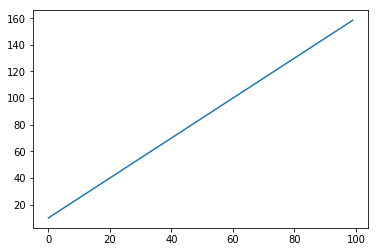

In [200]:
def f(x):
    return 1.5 * x + 10

xs = np.arange(0, 100)
plt.plot(xs, f(xs))

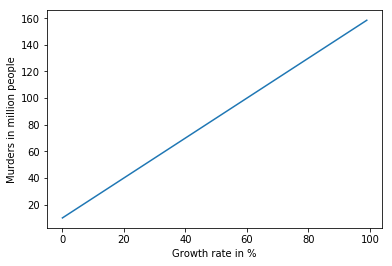

In [201]:
plt.ylabel('Murders in million people')
plt.xlabel('Growth rate in %')
plt.plot(xs, f(xs))

* How many murders do we get if our growth rate is 2%?

In [202]:
f(2)

13.0

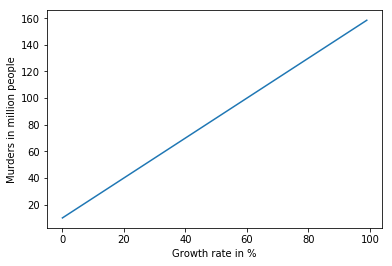

In [203]:
plt.ylabel('Murders in million people')
plt.xlabel('Growth rate in %')
plt.plot(xs, f(xs))

* What is the minimum amount of murders we can get, if we have a positive growth rate?

In [204]:
f(0)

10.0

## Non-linear models


\begin{align} y =\tfrac{1}{4}x^3+\tfrac{3}{4}x^2-\tfrac{3}{2}x + 10 \end{align} 

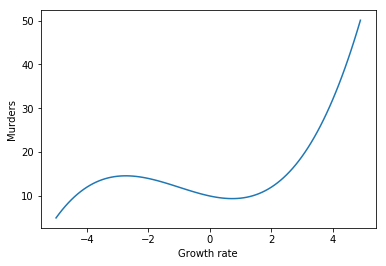

In [205]:
def g(x):
    return x ** 3 / 4 + 3 * x ** 2 / 4 - 3 * x / 2 + 10

plt.ylabel('Murders')
plt.xlabel('Growth rate')

xs = np.arange(-5, 5, 0.1)
plt.plot(xs, g(xs))

* How many murders do we get if our growth rate is 2%?

In [206]:
g(2)

12.0

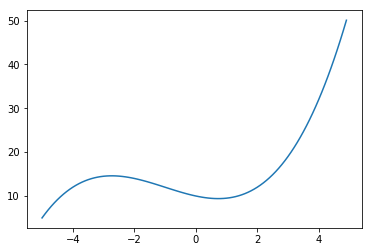

In [207]:
plt.plot(xs, g(xs))

* What is the minimum amount of murders we can get, if we have a positive growth rate?

In [208]:
g(0)

10.0

In [216]:
g(0.8)

9.408

## Optimum

* Global: The best value for the **entire** model
* Local: The best value for the model, in a local, small place


* **Very** important term
  * Models exist to be optimised: deaths, cancer, stock prices...

## Loss functions and optimum

* Your models has a loss function
  * Remember the MAE or RMSE
* You want to keep the loss function *low*

* Think about yourself as a human. You want to minimise pain and optimise pleasure

* New life purpose: How do we find the local or global optimum?
  * Video: [CCC: The ghost in the machine](https://media.ccc.de/v/35c3-10030-the_ghost_in_the_machine)

## Function gradients

\begin{align} y =\tfrac{1}{4}x^3+\tfrac{3}{4}x^2-\tfrac{3}{2}x + 10 \end{align} 


\begin{align} y =\tfrac{3}{4}x^2+\tfrac{6}{4}x-\tfrac{3}{2} \end{align} 

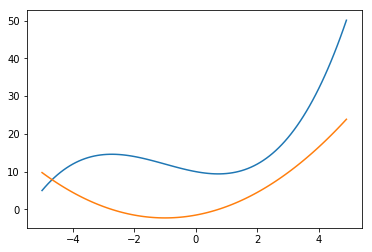

In [217]:
def g_prime(x):
    return 3 / 4 * x ** 2 + 6 / 4 * x - 3 / 2

plt.plot(xs, g(xs))
plt.plot(xs, g_prime(xs))

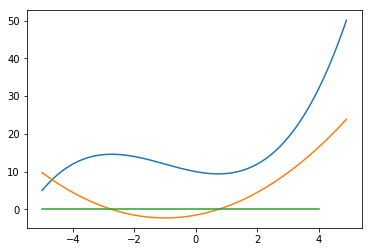

In [218]:
plt.plot(xs, g(xs))
plt.plot(xs, g_prime(xs))
plt.plot(np.arange(-5, 5), np.repeat(0, 10))

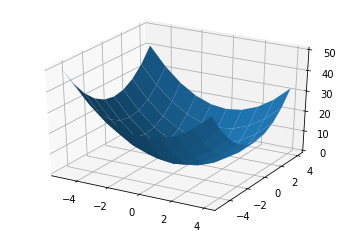

In [221]:
import mpl_toolkits.mplot3d
X, Y = np.meshgrid(np.arange(-5, 5), np.arange(-5, 5))
plt.gca(projection='3d') # plt.gca: Get Current Axis
plt.gca().plot_surface(X, Y, X ** 2 + Y ** 2)

## Estimating gradients

* Goal: figure out how $f(x)$ changes when $x$ changes

In [228]:
def difference_quotient(f, x, delta):
    return (f(x + delta) - f(x)) / delta

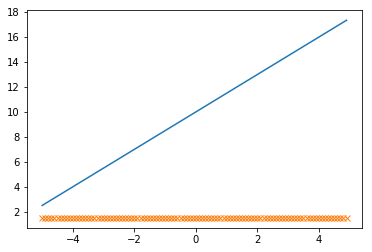

In [229]:
plt.plot(xs, f(xs))
plt.plot(xs, difference_quotient(f, xs, 0.001), 'x')

In [230]:
difference_quotient(f, 0, 0.001)

1.5000000000000568

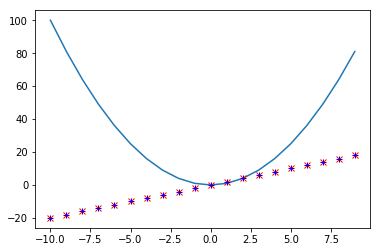

In [231]:
# Plot actual and estimated derivative of f(x) = x^2

def square(x):
    return x * x

def derivative(x):
    return 2 * x

def derivative_estimate(x):
    return difference_quotient(square, x, delta=0.00001)

xs = np.arange(-10,10)
plt.plot(xs, square(xs))
plt.plot(xs, derivative(xs), 'rx')           # red  x
plt.plot(xs, derivative_estimate(xs), 'b+')  # blue +
plt.show()  

## Differentiation

$f(x) = x^2$

$f'(x) = 2x$

* We are looking for the change $d$ in $f(x)$, when we change $x$ with $d$
  * Remember: `(f(x + delta) - f(x)) / delta`

${df \over dx} = f'(x)$

## Linear models

$\alpha x_1 + \beta x_2 + c$ 

... But how do we take the derivative of $x_1$, **and** $x_2$?


* Answer: By deriving one variable at the time

## Gradients and partial derivatives

$f(x, y) = x^2 + xy + y^2 = z$


![](https://upload.wikimedia.org/wikipedia/commons/2/2d/Partial_func_eg.svg)

Derivative between $x$ and $z$
![](https://upload.wikimedia.org/wikipedia/commons/f/fe/X2%2BX%2B1.svg)

We can say that our function $f(x, y) = x^2 + xy + y^2$ is the same as $f_y(x) = x^2 + xy + y^2$

In Python this is the same as

In [232]:
def fy(y):
    def fx(x): 
        return x ** 2 + x * y + y ** 2
    return fx

In [237]:
fy(1)(10)

111

So now we know that $y$ is constant, so that means that the derivative of 

$f_y(x) = x^2 + xy + y^2$ 
is

$f_y'(x) = 2x + y$

In math, this is written

${\partial f \over \partial x}(x, y) = 2x + y$

## Partial derivative

$\frac{df_{a_1,\ldots,a_{i-1},a_{i+1},\ldots,a_n}}{dx_i}(a_i) = \frac{\partial f}{\partial x_i}(a_1,\ldots,a_n).$

Taking the derivative of a function with many inputs, does not just give you *one* derivative, but *a list* of **partial derivatives**.

## Gradients

$\nabla f(a) = \left(\frac{\partial f}{\partial x_1}(a), \ldots, \frac{\partial f}{\partial x_n}(a)\right)$

In one point $a$, this gives us a list of partial derivatives, that tells us which direction each dimension is moving, in that exact point $a$.

This is called a **gradient**.


## Gradient descent

Forest analogy: You're lost in the mountain and has to find your way down

![](https://upload.wikimedia.org/wikipedia/commons/c/c7/Okanogan-Wenatchee_National_Forest%2C_morning_fog_shrouds_trees_%2837171636495%29.jpg)

Math analogy: You have a function, and the only thing you know is the *direction* it moves

In multiple dimensions the *direction* is in multiple dimensions. So we don't just need the derivative of the function in one dimension, we need it in multiple dimensions! 

We need the gradients! That's why it's called gradient descent.

![](https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg)

## Gradient descent: summary

* We have a loss function for our models
  * We like our loss to be **small**
* That loss function can be in multiple dimensions
  * It's **hard** to predict where the loss function is small
* Gradients gives us an idea on the *direction* the function is going
  * Direction **small** is good because it means a small loss

* Gradient descent steps in the direction of the loss
  * Until you find the smallest point

## Gradient descent in `sklearn`

In [ ]:
from sklearn.linear_model import SGDRegressor
SGDRegressor?

## Gradient descent example with science spending data

In [6]:
%pylab inline
import numpy as np 
import pandas as pd
data = pd.read_csv("science.csv")
data

Populating the interactive namespace from numpy and matplotlib


,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


In [7]:
xs = np.array(data['US science spending']).reshape(-1, 1)
ys = np.array(data['Suicides']).reshape(-1, 1)

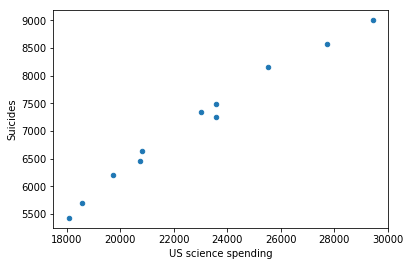

In [8]:
data.plot.scatter(x = 1, y = 2)

In [ ]:
model = SGDRegressor()
model.fit(xs, ys)

In [ ]:
model.predict([[100], [10000]])

In [ ]:
data.plot.scatter(x = 1, y = 2)
plt.plot(xs, model.predict(xs))

## Scaling data

Gradient descent goes in the direction of the gradient with respect to x.
If that gradient is very large, the steps we take are laaaarge.

What can we do to fix that?
Scale the data to be smaller!

In [194]:
from sklearn.preprocessing import scale

In [ ]:
xs_scaled = scale(xs)
xs_scaled

In [ ]:
model = SGDRegressor()
model.fit(xs_scaled, ys)

In [ ]:
plt.plot(xs_scaled, ys)
plt.plot(xs_scaled, model.predict(xs_scaled))

## Why don't we get any good results?!

To get the optimal solution, we have to take many steps towards the correct solution. 

Challenge:

* How many steps is the model taking now? (read the documentation)
* Can you make it take 100 steps? 1000 steps? 10000 steps?

## Recap

* Derivatives
  * The **rate of growth** for a function $f$
  * Normally defined at points like $x$: $f'(x)$
* Partial derivatives
  * Derivatives in multiple dimensions

* Gradient
  * A vector of derivatives, one for each dimension in a function $f$
* Gradient descent
  * A way to optimise a function by moving towards an optimum
  * For instance minimising a loss function

### Scaling data 
  * Standardising data into a smaller space